Question 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = "Resources/merged_data.csv"


original_data = pd.read_csv(file)

original_data.head()

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
0,Afghanistan,2020,54771898.0,3.892834,2.011614e+10,516.747871,5.477190
1,Albania,2020,12904896.0,0.283785,1.513187e+10,5332.160475,1.290490
2,Algeria,2020,201992285.0,4.385104,1.450092e+11,3306.858208,20.199229
3,Angola,2020,84297733.0,3.286627,5.361907e+10,1631.431691,8.429773
4,Antigua and Barbuda,2020,215545.0,0.009793,1.370281e+09,13992.744480,0.021555


Only filtering out South Asia region

In [3]:
filtered_data = original_data[original_data['Country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'])].reset_index(drop=True)
filtered_data

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
0,Afghanistan,2020,5.477190e+07,3.892834,2.011614e+10,516.747871,5.477190
1,Bangladesh,2020,5.330869e+08,16.468938,3.739021e+11,2270.347535,53.308693
2,Bhutan,2020,2.096207e+06,0.077161,2.315436e+09,3000.777986,0.209621
3,India,2020,2.472701e+09,138.000439,2.667688e+12,1933.101069,247.270061
4,Nepal,2020,1.353131e+08,2.913681,3.343367e+10,1147.471971,13.531306
5,Pakistan,2020,1.804460e+09,22.089233,3.003063e+11,1359.514522,180.446048
6,Sri Lanka,2020,3.737842e+07,2.191900,8.096968e+10,3694.040948,3.737842


Now Getting top 5 and bottom 5 population sizes

In [4]:
filtered_data["Population Size"].max()

1380004385.0

In [5]:
filtered_data.loc[filtered_data["Population Size"] == filtered_data["Population Size"].max()]

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069


In [6]:
top5 = filtered_data.nlargest(5, "Population Size")
top5

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
5,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
1,Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
4,Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971


In [7]:
filtered_data["Population Size"].min()

771612.0

In [8]:
filtered_data.loc[filtered_data["Population Size"] == filtered_data["Population Size"].min()]

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
2,Bhutan,2020,2096207.0,771612.0,2.315436e+09,3000.777986


In [9]:
bottom5 = filtered_data.nsmallest(5, "Population Size")
bottom5

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
2,Bhutan,2020,2096207.0,771612.0,2.315436e+09,3000.777986
6,Sri Lanka,2020,37378424.0,21919000.0,8.096968e+10,3694.040948
4,Nepal,2020,135313064.0,29136808.0,3.343367e+10,1147.471971
0,Afghanistan,2020,54771898.0,38928341.0,2.011614e+10,516.747871
1,Bangladesh,2020,533086932.0,164689383.0,3.739021e+11,2270.347535


Graphing top 5 and bottom 5 populations

In [10]:
x_axis = np.array(top5["Country"])
x_axis

y_axis = np.array(top5["Value"])
y_axis

array([2.47270061e+09, 1.80446048e+09, 5.33086932e+08, 5.47718980e+07,
       1.35313064e+08])

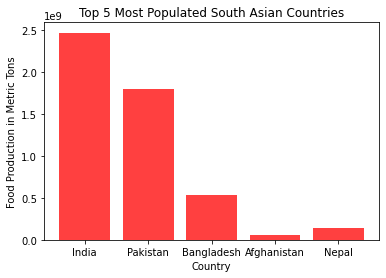

In [11]:
# plt.title("Top 5 Most Populated South Asian Countries")
# plt.xlabel("Country")
# plt.ylabel("Food Production in Metric Tons")

# plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")

# saving as png
# plt.savefig("Graphs/top5_populated.png")

# plt.show()

In [12]:
# x2_axis = np.array(bottom5["Country"])
# x2_axis

# y2_axis = np.array(bottom5["Value"])
# y2_axis

array([2.09620700e+06, 3.73784240e+07, 1.35313064e+08, 5.47718980e+07,
       5.33086932e+08])

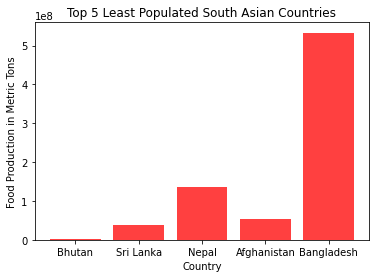

In [13]:
# plt.title("Top 5 Least Populated South Asian Countries")
# plt.xlabel("Country")
# plt.ylabel("Food Production in Metric Tons")
# # plt.xticks(rotation=45)
# plt.bar(x2_axis, y2_axis, facecolor="red", alpha=0.75, align="center")

# # saving as png
# # plt.savefig("Graphs/bottom5_populated.png")

# plt.show()

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
5,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
1,Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
4,Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971
6,Sri Lanka,2020,3.737842e+07,2.191900e+07,8.096968e+10,3694.040948
2,Bhutan,2020,2.096207e+06,7.716120e+05,2.315436e+09,3000.777986


In [44]:
# filtered_data["Production"] = filtered_data["Value"].div(1000000)
# filtered_data


,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita,Production
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871,54.771898
1,Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535,533.086932
2,Bhutan,2020,2.096207e+06,7.716120e+05,2.315436e+09,3000.777986,2.096207
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069,2472.700614
4,Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971,135.313064
5,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522,1804.460483
6,Sri Lanka,2020,3.737842e+07,2.191900e+07,8.096968e+10,3694.040948,37.378424


In [4]:
highest_pop = filtered_data.nlargest(7, ["Population Size in Millions"])
highest_pop

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
3,India,2020,2.472701e+09,138.000439,2.667688e+12,1933.101069,247.270061
5,Pakistan,2020,1.804460e+09,22.089233,3.003063e+11,1359.514522,180.446048
1,Bangladesh,2020,5.330869e+08,16.468938,3.739021e+11,2270.347535,53.308693
0,Afghanistan,2020,5.477190e+07,3.892834,2.011614e+10,516.747871,5.477190
4,Nepal,2020,1.353131e+08,2.913681,3.343367e+10,1147.471971,13.531306
6,Sri Lanka,2020,3.737842e+07,2.191900,8.096968e+10,3694.040948,3.737842
2,Bhutan,2020,2.096207e+06,0.077161,2.315436e+09,3000.777986,0.209621


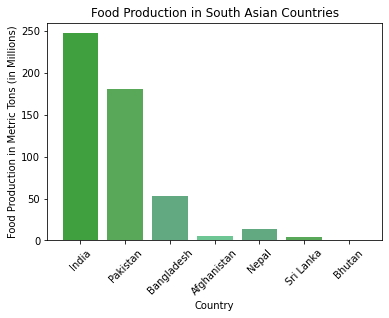

<Figure size 576x432 with 0 Axes>

In [35]:
x = np.array(highest_pop["Country"])
x

y = np.array(highest_pop["Production in Millions"])
y

plt.title("Food Production in South Asian Countries")
plt.xlabel("Country")
plt.ylabel("Food Production in Metric Tons (in Millions)")

plt.xticks(rotation=45)

# plt.yticks(arrange(y.max()),highest_pop["Value"] / 1e7)
plt.bar(x, y, color = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'green'], alpha=0.75, align="center")
plt.figure(figsize=(8,6))

# saving as png

plt.savefig("Graphs/food_prod_vs_population.png")

plt.show()

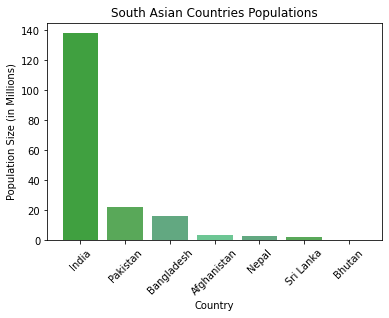

<Figure size 640x480 with 0 Axes>

In [34]:
x = np.array(highest_pop["Country"])
x

y2 = np.array(highest_pop["Population Size in Millions"])
y2

plt.title("South Asian Countries Populations")
plt.xlabel("Country")
plt.ylabel("Population Size (in Millions)")

plt.xticks(rotation=45)
# plt.yticks(arrange(y.max()),highest_pop["Value"] / 1e7)
plt.bar(x, y2, color = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'green'], alpha=0.75, align="center")
plt.figure(figsize=(8,6))

# saving as png
plt.savefig("Graphs/population_sizes.png")

plt.show()